## Averages & Standard Deviations between Frames


In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
from matplotlib import cm

videoFile = "ball_tracking_example.mp4"
camera = cv2.VideoCapture(videoFile)
# Placeholder. If we don't read anything - we can throw later
grey = np.array([])

# get the first n seconds of the video
seconds = 5
fps = camera.get(cv2.CAP_PROP_FPS)
totalFrames = int(fps * seconds)


Now, read the required frames

In [2]:
for i in range(0, totalFrames):
    grabbed, frame = camera.read()

    # leave if no more frames to grab
    if not grabbed:
        break

    # grey scale conversion
    greyFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # on start, we allocate all the memory at once
    if i == 0:
        y, x = greyFrame.shape
        grey = np.empty((y,x,totalFrames), dtype="uint8")

    grey[:,:,i] = greyFrame

if grey.size == 0:
    raise "Bad video"

See what we have got (just the first frame in the next second)

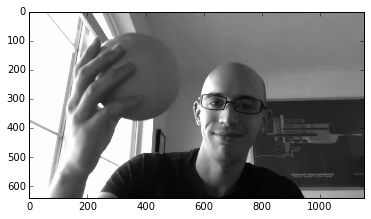

In [3]:
plt.imshow(grey[:,:,30], cmap= cm.gray)
plt.show()

Compute all the metrics

In [4]:
# compute the metrics
deltas = grey[:, :, 1:] - grey[:, :, :totalFrames - 1]
# means and stds over the first two dimensions
means = deltas.mean((0, 1))
stds = deltas.std((0, 1))


Now plot them

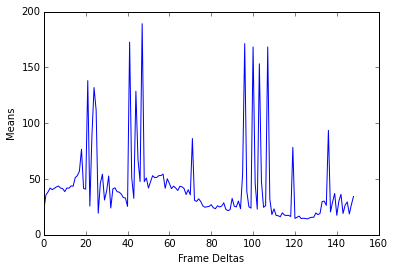

In [7]:
plt.plot(means)
plt.ylabel("Means")
plt.xlabel("Frame Deltas")
plt.show()

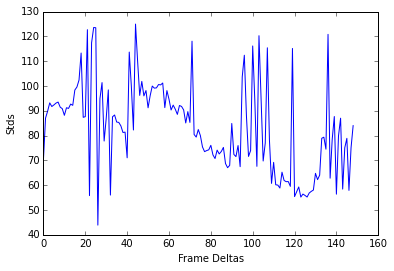

In [8]:
plt.plot(stds)
plt.ylabel("Stds")
plt.xlabel("Frame Deltas")
plt.show()